In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=2023)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

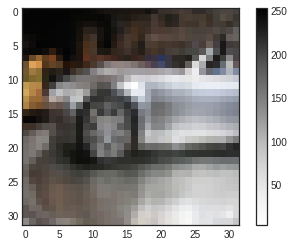

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
x_train[0]

array([  7,   7,   6, ..., 197, 196, 199], dtype=uint8)

In [9]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
x_train[0]

array([0.02745098, 0.02745098, 0.02352941, ..., 0.77254902, 0.76862745,
       0.78039216])

In [12]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(1024))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
model.save('thankyoualls')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0

In [13]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('thankyoualls', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=100, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=1000,batch_size = 1024,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
40/40 [==============================] - 2s 23ms/step - loss: 2.1381 - accuracy: 0.1255 - val_loss: 2.2885 - val_accuracy: 0.1175
INFO:tensorflow:Assets written to: thankyoualls/assets
Epoch 2/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.9261 - accuracy: 0.1133 - val_loss: 2.8295 - val_accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.8778 - accuracy: 0.1080 - val_loss: 1.9788 - val_accuracy: 0.0202
INFO:tensorflow:Assets written to: thankyoualls/assets
Epoch 4/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.8350 - accuracy: 0.1016 - val_loss: 1.8000 - val_accuracy: 0.1759
INFO:tensorflow:Assets written to: thankyoualls/assets
Epoch 5/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.8038 - accuracy: 0.0972 - val_loss: 1.9379 - val_accuracy: 0.0802
Epoch 6/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.7791 - accuracy: 0.0935 - val_loss: 2.1

In [14]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [15]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4278 - accuracy: 0.1392


[1.4277629852294922, 0.13920000195503235]

## 회고

1) ValueError: Shapes (32, 10) and (32, 1) are incompatible 에러발생
데이터 셋의 문제가 아니라 
model.compile(loss='sparse_categorical_crossentropy',
loss 파트를 이렇게 바꿈으로 해결.


2) 돌아가나 결과값은 아주 처참하다.. https://www.kaggle.com/code/nataliakhol/cifar10-transfer-learning
캐글에서 잘된 결과를 보면 정확도가 90%가 넘는데.. 코드가 이해되지 않는다. 한참 파봐야할듯하다..